<a href="https://colab.research.google.com/github/soodeh-nilforoushan/Recurrent-Neural-Network/blob/main/3_TF_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#install tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
mnist=tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test)=mnist.load_data()
#Next we normalize X train and X test by dividing by 255. Since the original values are between 0 and 255.
#This will scale them to be between 0 and 1.
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train.shape: (60000, 28, 28)


each image is the same size 28 by 28 pixels, which is equal to 784 pixels in total.

The Mnist dataset contains only grayscale images, so the images are just of size 28*28, not 28*28*3 which is what they would be if they had color

The image pixels are stored as integers from 0 to 255, so we'll have to scale them to go from 0 to 1

In [12]:
from keras.api._v2.keras import activations
#build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #we randmly choose 128
    tf.keras.layers.Dense(128, activation="relu"),
    #drop out probability which 20%
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
    ])

In [13]:
#complie the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
#train the model
r= model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2950 - accuracy: 0.9153 - val_loss: 0.1390 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1426 - accuracy: 0.9579 - val_loss: 0.0980 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1084 - accuracy: 0.9679 - val_loss: 0.0804 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0864 - accuracy: 0.9739 - val_loss: 0.0796 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0758 - accuracy: 0.9769 - val_loss: 0.0735 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.0664 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0578 - accuracy: 0.9818 - val_loss: 0.0750 - val_accu

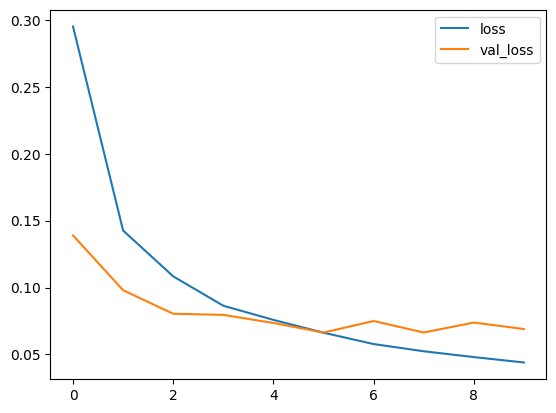

In [16]:
# plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

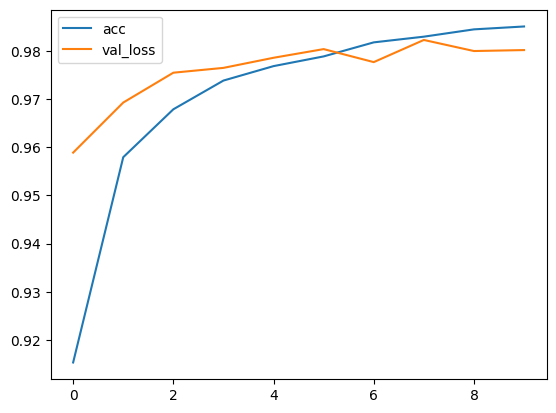

In [17]:
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_loss")
plt.legend()